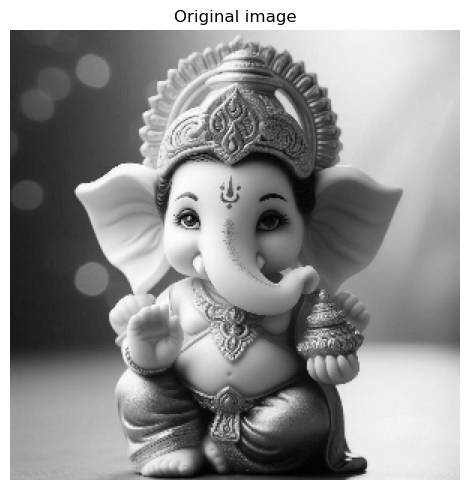

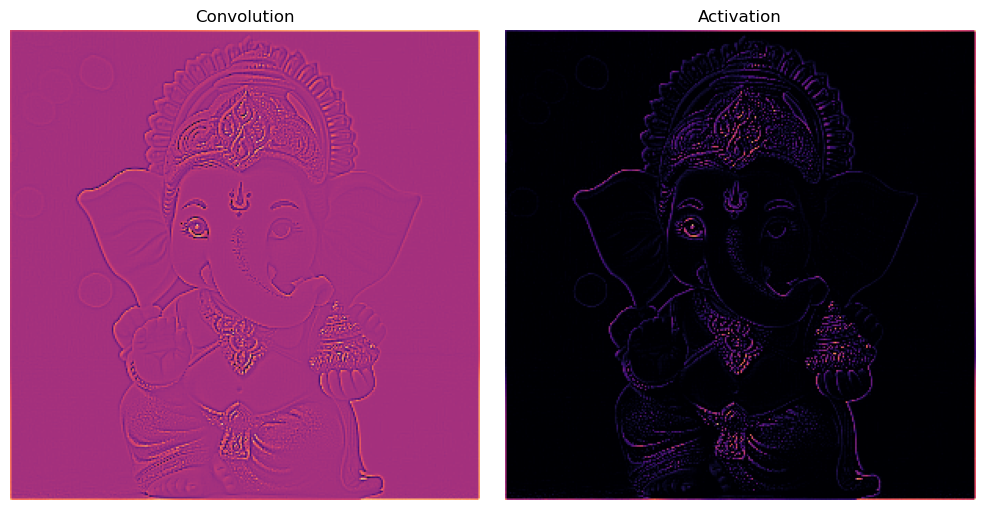

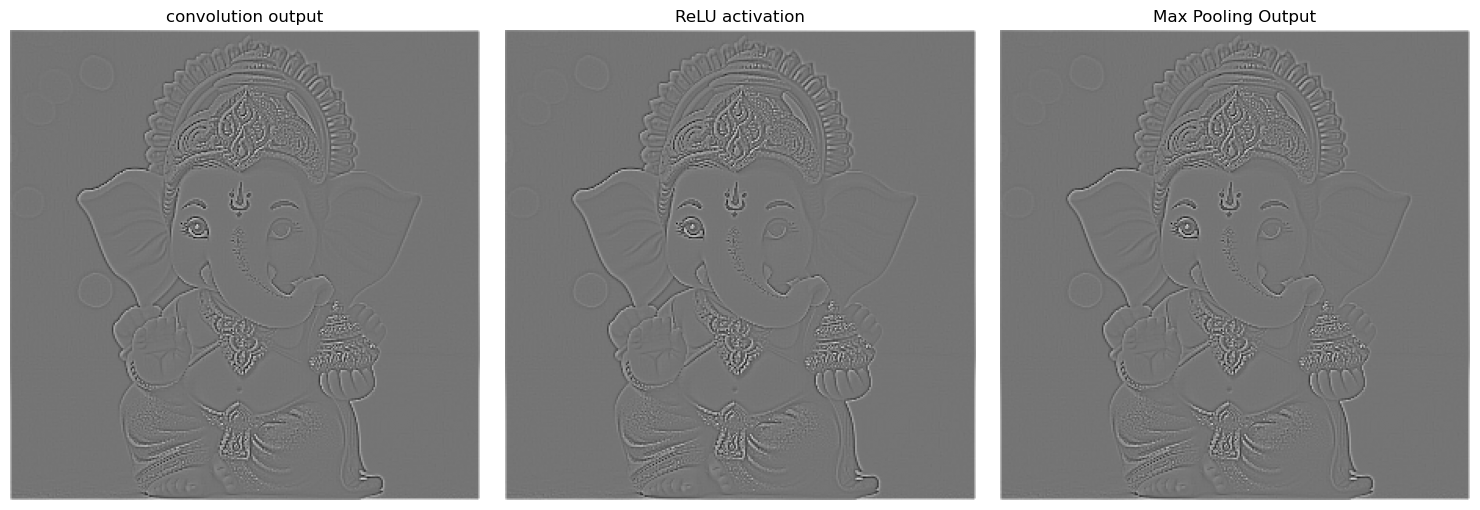

In [36]:
#Implement image edge detection using convolut
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product
 #set the param
plt.rc('figure',autolayout=True)
plt.rc('image',cmap='magma')

#define the kernal
kernel = tf.constant([[-1,-1,-1],[-1,8,-1],[-1,-1,-1],])
# loding image
image = tf.io.read_file('image.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300,300])
 #plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original image')
plt.show();


#Reformat

image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast (kernel, dtype=tf.float32)

#convolution layuer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(input=image,filters=kernel,strides=1,padding='SAME',)
plt.figure(figsize=(15,5))

#plot the convolved image
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

#activation layer
relu_fn=tf.nn.relu

#image detection
image_detect=relu_fn(image_filter)
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

#pooling layer
image_condense=tf.nn.pool(
    input=image_detect,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2,2),
    padding='SAME')
#display all results

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(image_filter),cmap='grey')
plt.title('convolution output')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_filter),cmap='grey')
plt.title('ReLU activation')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_filter),cmap='grey')
plt.title('Max Pooling Output')
plt.axis('off')
plt.show()